Kai Jin

final project 2

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.table import Column
from sklearn import tree
from collections import Counter

In [2]:
#Drop garbage column data
def drop_col(data, cols):
    return data.drop(data.columns[cols], axis=1)

In [3]:
#Calculate the difference between prediction and real data value
def get_error(v1, v2):
    return np.sum(np.absolute(v1-v2))

In [4]:
file = fits.open('./gll_psc_v21.fit')
data = file[1].data
evt_data = Table(data)

In [5]:
#remove data can not input to pandas dataframe and not useful
cols_remove = ['Flux_Band', 'Unc_Flux_Band', 'nuFnu_Band', 'Sqrt_TS_Band', 'Flux_History', 'Unc_Flux_History',
               'Sqrt_TS_History', 'Flux2_History', 'Unc_Flux2_History', 'Sqrt_TS2_History','Source_Name',
               'Extended_Source_Name','ASSOC_FGL', 'ASSOC_FHL', 'ASSOC_GAM1', 'ASSOC_GAM2', 'ASSOC_GAM3',
               'TEVCAT_FLAG', 'ASSOC_TEV', 'ASSOC1', 'ASSOC2', 'ASSOC_PROB_BAY', 'ASSOC_PROB_LR', 'SpectrumType', 'Flags']
evt_data.remove_columns(cols_remove)

In [6]:
#Combine two columns of class into one column
c = np.array([i+j for i, j in zip(evt_data['CLASS1'], evt_data['CLASS2'])])
c = [x.strip() for x in c]
#Give each type of star an int code
l = []
for e in c:
    if e=='agn':
        l.append(1)
    elif e=='bcu':
        l.append(2)
    elif e=='bin':
        l.append(3)
    elif e=='bll':
        l.append(4)
    elif e=='css':
        l.append(5)
    elif e=='fsrq':
        l.append(6)
    elif e=='gal':
        l.append(7)
    elif e=='glc':
        l.append(8)
    elif e=='hmb':
        l.append(9)
    elif e=='mc':
        l.append(10)
    elif e=='nlsy1':
        l.append(11)
    elif e=='nov':
        l.append(12)
    elif e=='PSR':
        l.append(13)
    elif e=='psr':
        l.append(14)
    elif e=='pwn':
        l.append(15)
    elif e=='rdg':
        l.append(16)
    elif e=='sbg':
        l.append(17)
    elif e=='sey':
        l.append(18)
    elif e=='sfr':
        l.append(19)
    elif e=='snr':
        l.append(20)
    elif e=='spp':
        l.append(21)
    elif e=='ssrq':
        l.append(22)
    else:
        l.append(0)
    # 0 for unknown and no specific situations
CLASS = l

In [7]:
#delete old two CLASS columns and inject the new one
col_c = Column(name='CLASS', data=l)
evt_data.add_column(col_c)
evt_data.remove_columns(['CLASS1', 'CLASS2'])
#build pandas dataframe
df = evt_data.to_pandas()

In [8]:
#replace all 'nan' value to 0
for col in df:
    df[col] = df[col].replace('nan', np.nan).fillna(0)

In [9]:
#copy 
drop_col(df, [0,1,2,3,6,9,10,11,12,19,23,24,25,26,27,30,31,36,37,38,39,40,41,44,45,46,47,48,49,52,53,54,55])

,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_95_SemiMajor,Conf_95_SemiMinor,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,PL_Flux_Density,Unc_PL_Flux_Density,...,PLEC_Expfactor,Unc_PLEC_Expfactor,PLEC_Exp_Index,Unc_PLEC_Exp_Index,Flux_Peak,Unc_Flux_Peak,Flux2_Peak,Unc_Flux2_Peak,Unc_Counterpart,CLASS
0,0.032378,0.031453,0.0525,0.0510,1.719459e-10,3.109978e-11,1.920053e-12,3.520472e-13,2.947622e-14,5.331761e-15,...,0.001466,0.001689,0.666667,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
1,0.036880,0.033180,0.0598,0.0538,1.425261e-10,3.706167e-11,1.630798e-12,4.481353e-13,2.581922e-14,6.712033e-15,...,0.000131,0.000818,0.666667,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.400000e-07,2
2,0.018440,0.017577,0.0299,0.0285,8.397412e-10,6.210809e-11,9.440178e-12,6.506530e-13,5.775262e-13,3.850488e-14,...,0.000880,0.000833,0.666667,0.0,0.000000e+00,0.000000e+00,2.600444e-08,7.814623e-09,1.800000e-07,4
3,0.026026,0.023991,0.0422,0.0389,9.679271e-10,6.664196e-11,1.926035e-11,8.209581e-13,2.456884e-11,9.654817e-13,...,0.008391,0.001911,0.666667,0.0,2.045710e-07,6.975799e-09,3.778854e-07,1.931779e-08,3.400000e-07,6
4,0.042678,0.032378,0.0692,0.0525,2.808932e-10,3.807001e-11,3.386480e-12,4.914043e-13,2.436634e-14,3.284304e-15,...,0.000186,0.000362,0.666667,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.900000e-05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,0.014061,0.013568,0.0228,0.0220,5.306907e-10,4.974376e-11,6.070889e-12,5.986017e-13,6.918735e-14,6.485965e-15,...,0.000035,0.000244,0.666667,0.0,0.000000e+00,0.000000e+00,1.452120e-08,3.904421e-09,1.100000e-06,4
5061,0.033427,0.031268,0.0542,0.0507,1.403424e-10,3.414508e-11,1.563827e-12,3.800622e-13,1.796356e-14,4.363398e-15,...,0.001124,0.001352,0.666667,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e-07,2
5062,0.024607,0.021462,0.0399,0.0348,3.251680e-10,4.133409e-11,3.619640e-12,4.677508e-13,7.328716e-14,9.226786e-15,...,0.000379,0.000579,0.666667,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-06,4
5063,0.136728,0.088377,0.2217,0.1433,1.642217e-10,3.769393e-11,2.542465e-12,4.864103e-13,5.691104e-13,1.062319e-13,...,0.022523,0.016202,0.666667,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e-03,1


In [10]:
#Get train and test data
train_data = df.iloc[::2]
test_data = df.iloc[1::2]

In [11]:
#Build predict model
train_y = np.array(train_data['CLASS'])
train_X = np.array(train_data.drop(['CLASS'], axis=1))
clf = tree.DecisionTreeRegressor().fit(train_X, train_y)

In [12]:
#get prediction and calculate accuracy
test_y = np.array(test_data['CLASS'])
test_X = np.array(test_data.drop(['CLASS'], axis=1))
prediction = clf.predict(test_X)

get_error(prediction,test_y)

4776.0

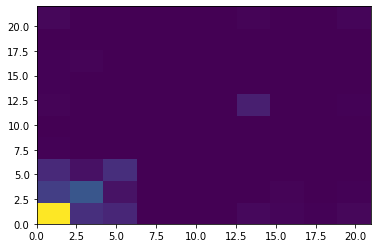

In [13]:
#Plot a 2D histogram graph
_=plt.hist2d(prediction, test_y, bins=10)

In [14]:
#get diff for each prediction and real value
diff=np.abs(np.subtract(prediction,test_y))

In [15]:
#get terms which have a diff greater than 5
n=[]
for i in range(len(diff)):
    if diff[i]>5:
        n.append(i)
        
l=[]
for i in n:
    l.append(test_y[i])

In [16]:
#count diff for each prediction and real value
a=dict(Counter(diff))
print(a)

{2.0: 431, 6.0: 36, 0.0: 1539, 13.0: 26, 12.0: 23, 3.0: 21, 4.0: 236, 1.0: 73, 5.0: 11, 16.0: 7, 17.0: 8, 14.0: 22, 15.0: 6, 20.0: 8, 9.0: 7, 10.0: 4, 18.0: 5, 7.0: 10, 11.0: 7, 19.0: 8, 21.0: 23, 8.0: 21}


In [17]:
#count terms which have a diff greater than 5
a=dict(Counter(l))
print(a)

{6: 20, 13: 24, 4: 20, 0: 47, 17: 6, 2: 27, 1: 8, 16: 13, 20: 4, 15: 3, 9: 1, 22: 2, 18: 3, 21: 29, 14: 4, 8: 10}


In [18]:
#get terms which the result is precise
n=[]
for i in range(len(diff)):
    if diff[i]==0:
        n.append(i)
        
l=[]
for i in n:
    l.append(test_y[i])

In [19]:
#count terms which the result is precise
a=dict(Counter(l))
print(a)

{2: 354, 0: 638, 6: 141, 4: 292, 13: 91, 20: 2, 1: 8, 21: 9, 8: 3, 14: 1}


In [20]:
#find average error
ave_error=get_error(prediction,test_y)/len(test_y)
ave_error

1.886255924170616

In [21]:
#get terms which the result is not precise
n=[]
for i in range(len(diff)):
    if diff[i]!=0:
        n.append(i)
        
l=[]
for i in n:
    l.append(test_y[i])
    
#count terms which the result is not precise
a=dict(Counter(l))
print(a)

{2: 283, 6: 177, 13: 25, 4: 273, 1: 57, 16: 14, 0: 86, 17: 7, 11: 1, 5: 3, 20: 5, 15: 3, 9: 1, 22: 2, 18: 3, 8: 15, 21: 32, 14: 6}
